In [ ]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                        value_serializer=lambda v: json.dumps(v).encode('ascii'),
                        key_serializer=lambda v: json.dumps(v).encode('ascii'))

In [94]:
from kafka import KafkaProducer
from kafka.errors import KafkaError

In [95]:
producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                        value_serializer=lambda v: json.dumps(v).encode('ascii'),
                        key_serializer=lambda v: json.dumps(v).encode('ascii'))

In [1]:
from kafka import KafkaProducer
from kafka.errors import KafkaError
import json
from dotenv import load_dotenv
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle


producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                        value_serializer=lambda v: json.dumps(v).encode('ascii'),
                        key_serializer=lambda v: json.dumps(v).encode('ascii'))

In [3]:
next_finding_cat_name = 1

producer.send('find_cat', 
              key={'id':100},
              value={'name': 'pavel', 
                     'breez': 'xxx',
                    'img_path': '...img',
                    'geo': 111}
             )
producer.flush()

In [19]:
load_dotenv()
database_path = os.environ['CAT_INDIVIDUALS_DS_PATH']

cat_img = database_path + '0455/0455_357/IMG_6935.jpg'
with open(cat_img, 'rb') as f:
    img_str = f.read()

In [81]:

producer = KafkaProducer(bootstrap_servers=['localhost:9092'],
                        value_serializer=lambda v: json.dumps(v).encode('utf-8'),
                        key_serializer=lambda v: json.dumps(v).encode('utf-8'))


# convert image to string
import base64
image_to_kafka = base64.b64encode(img_str).decode()

# put string image into dictionary
some_dict = {
             'some_id': 123, 
             'image': image_to_kafka
            }

# send using your producer
producer.send('imgs', key={'id':1000}, value=some_dict)
producer.flush()

In [62]:
producer.send('find_cat', 
              key={'id':2},
              value={'name': 'pavel', 
                     'breez': 'xxx', 
                    'img': img_str.decode("ascii")}
             )
producer.flush()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xff in position 0: ordinal not in range(128)

 https://github.com/dpkp/kafka-python/issues/1045

In [89]:

from kafka import KafkaProducer
producer=KafkaProducer(bootstrap_servers=['localhost:9092'],
                       api_version=(0,10,1))
image = cv2.imread(cat_img)
ret, buffer = cv2.imencode('.jpg', image)
producer.send("TestTopic",buffer.tobytes())

In [39]:
from kafka import KafkaProducer
producer=KafkaProducer(bootstrap_servers=['localhost:9092'],api_version=(0,10,1))
image = cv.imread(cat_img)
ret, buffer = cv.imencode('.jpg', image)
producer.send("TestTopic",buffer.tobytes())
 

img string 2 img

In [27]:
# nparr = np.fromstring(img_str, np.uint8)
# img_np = cv.imdecode(nparr, cv.IMREAD_COLOR)

/tmp/ipykernel_9014/3485897192.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(img_str, np.uint8)


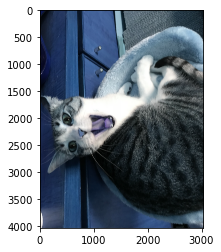

In [32]:
# fig, ax = plt.subplots()

# ax.imshow(img_np)
# plt.show()

In [56]:
producer.send('find_cat', 
              key={'id':2},
              value={'name': 'pavel', 
                     'breez': 'xxx' }
             )
producer.flush()

In [22]:
# Asynchronous by default
future = producer.send('my-topic', b'raw_bytes')

# Block for 'synchronous' sends
try:
    record_metadata = future.get(timeout=10)
except KafkaError:
    # Decide what to do if produce request failed...
    log.exception()
    pass

# Successful result returns assigned partition and offset
print (record_metadata.topic)
print (record_metadata.partition)
print (record_metadata.offset)

# produce keyed messages to enable hashed partitioning
producer.send('my-topic', key=b'foo', value=b'bar')

# encode objects via msgpack
# producer = KafkaProducer(value_serializer=msgpack.dumps)
# producer.send('msgpack-topic', {'key': 'value'})

# produce json messages
# producer = KafkaProducer(value_serializer=lambda m: json.dumps(m).encode('ascii'))
# producer.send('json-topic', {'key': 'value'})

# # produce asynchronously
# for _ in range(100):
#     producer.send('my-topic', b'msg')

def on_send_success(record_metadata):
    print(record_metadata.topic)
    print(record_metadata.partition)
    print(record_metadata.offset)

def on_send_error(excp):
    log.error('I am an errback', exc_info=excp)
    # handle exception

# # produce asynchronously with callbacks
producer.send('my-topic', b'raw_bytes').add_callback(on_send_success).add_errback(on_send_error)

# # block until all async messages are sent
# producer.flush()

# # configure multiple retries
# producer = KafkaProducer(retries=5)

TypeError: Object of type bytes is not JSON serializable